<a href="https://colab.research.google.com/github/vamshidhar1794/AIML-2024-2025/blob/main/AIML_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/sample_data/Classified_Data.txt")
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0  0,0.9139173265804122,1.162072707738686,0.56794...   
1  1,0.6356319040582334,1.0037216291809468,0.5353...   
2  2,0.7213598079583814,1.2014926236186863,0.9219...   
3  3,1.2342044015229892,1.3867262910227907,0.6530...   
4  4,1.2794908243775642,0.9497495573001323,0.6272...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   ,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count                                                1000   
unique                                               1000   
top     0,0.9139173265804122,1.162072707738686,0.56794...   
freq                                                    1

In [ ]:
l=list(df.columns)
l[0:len(l)-2]

[]

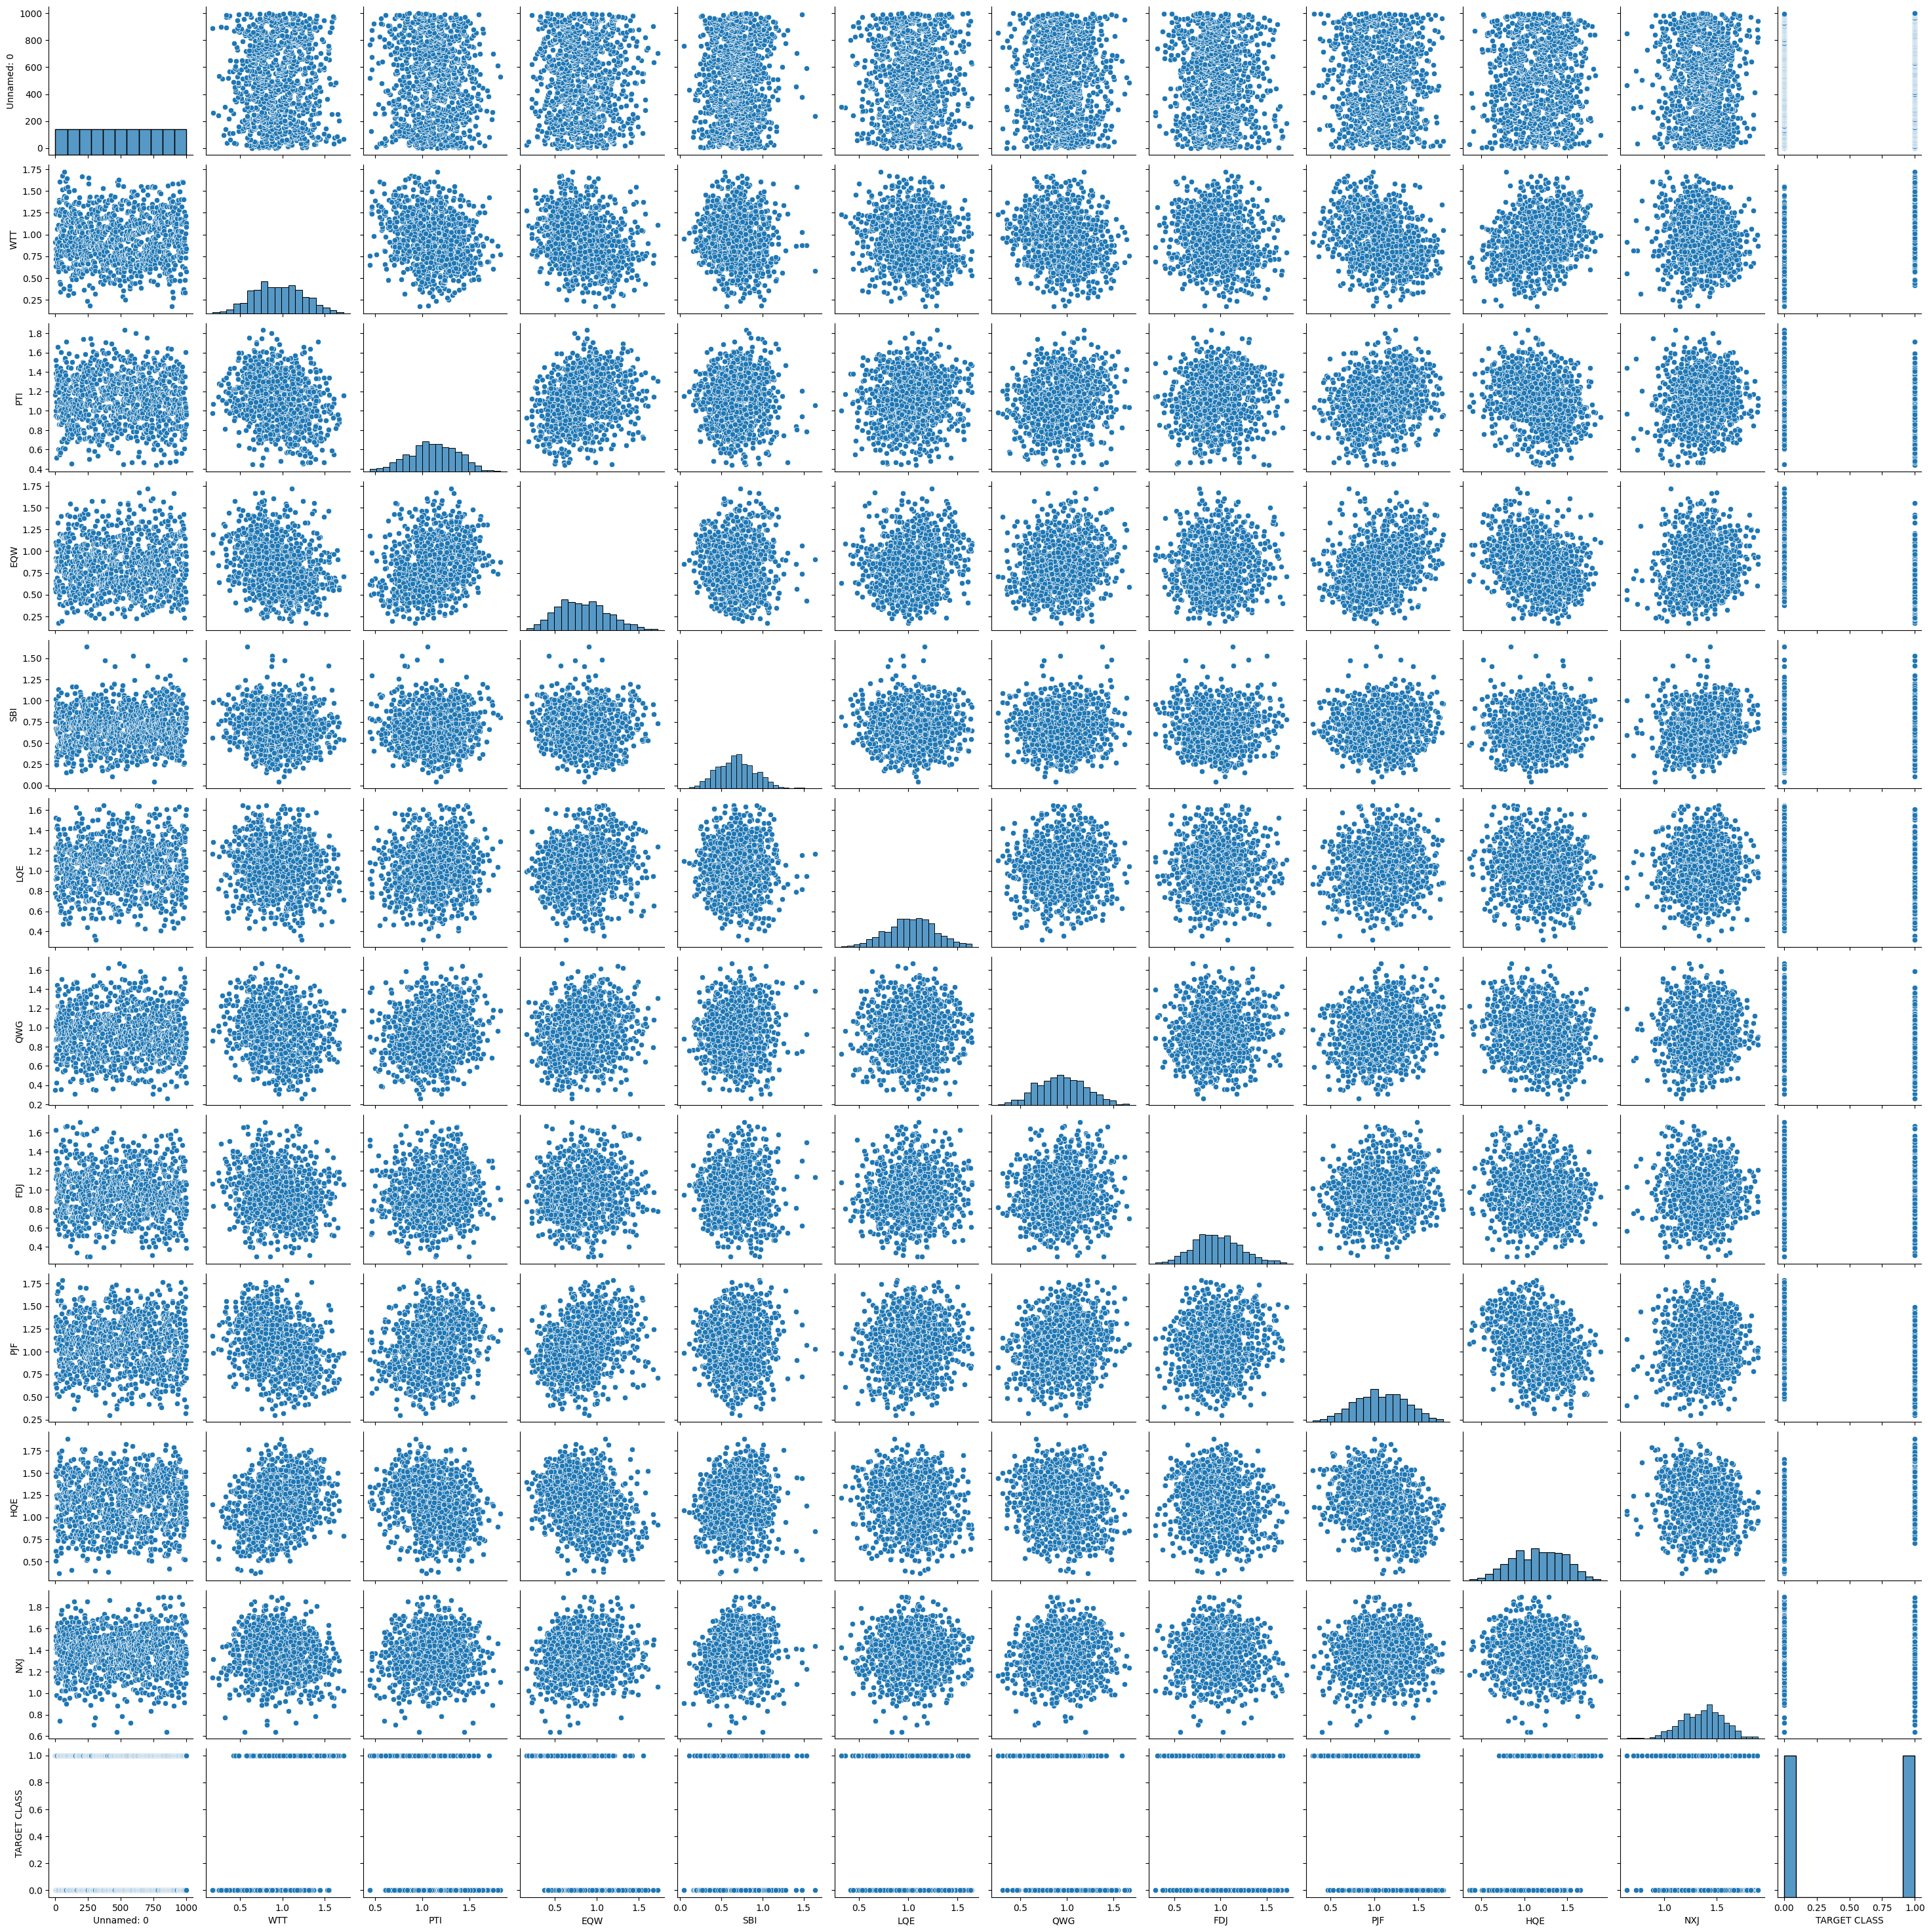

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# The delimiter in the original code might be incorrect, causing all columns to be merged into one.
# Trying to specify the delimiter explicitly, assuming it's a comma (',')
df = pd.read_table("/content/sample_data/Classified_Data.txt", sep=",")
# If the delimiter is different (e.g., tab '\t'), change the 'sep' argument accordingly.

df.head()

sns.pairplot(df)

In [ ]:
for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   

        FDJ       PJF       HQE       NXJ  
0 -0.798951 -1.482368 -0.949719 -0.643314  
1 -1.129797 -0.202240 -1.828051  0.636759  
2  2.599818  0.285707 -0.682494 -0.377850  
3  1.750208  1.066491  1.241325 -1.026987  
4  0.596782 -1.472352  1.040772  0.276510

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                 test_size=0.20, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



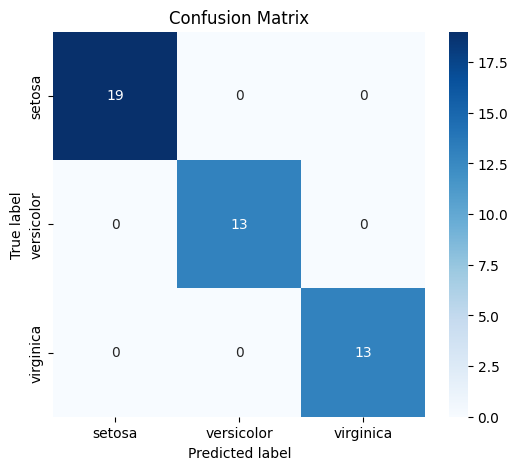

In [ ]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
pred = knn.predict(X_test)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_mat)

# Generate the classification report
class_report = classification_report(y_test, pred, target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification)')

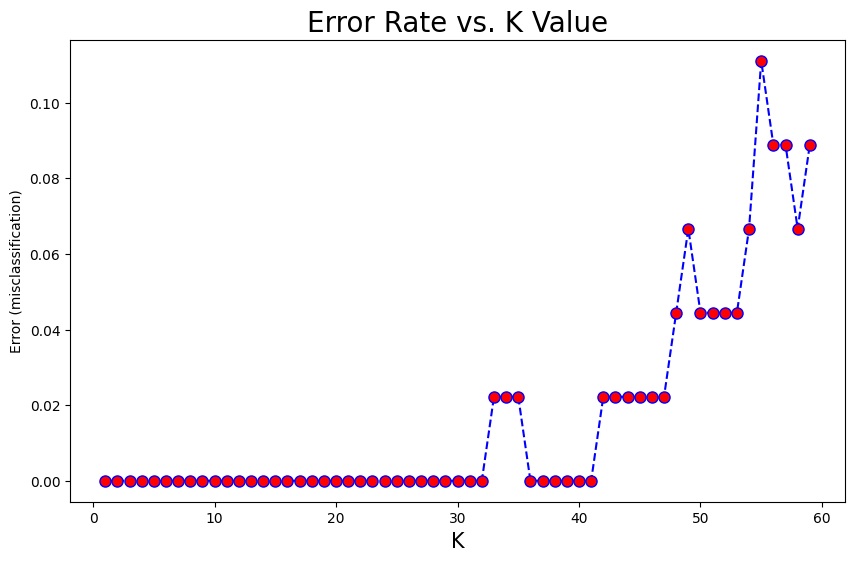

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification)' )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, we'll focus on class 0 versus classes 1 and 2
y_binary = (y == 0).astype(int)  # 1 if class 0, else 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

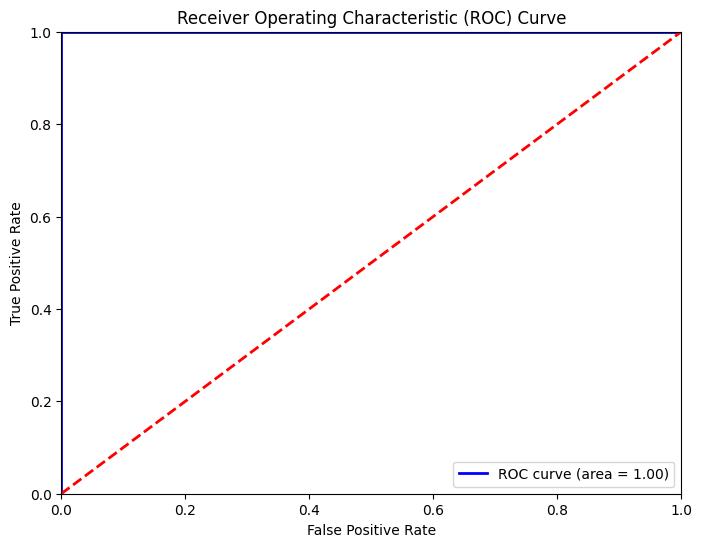

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

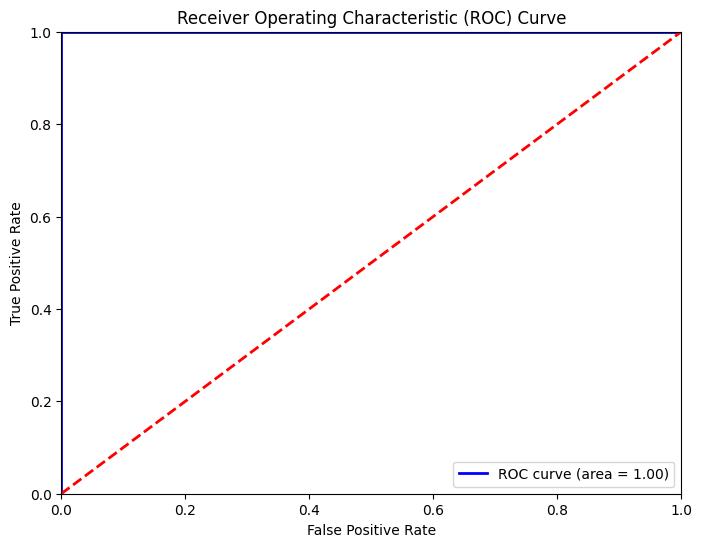